In [1]:
import pandas as pd

In [2]:
data=pd.read_csv(r"Part4 - batting_bowling_ipl_bat.csv")

In [3]:
data.isnull().sum()

Name     90
Runs     90
Ave      90
SR       90
Fours    90
Sixes    90
HF       90
dtype: int64

In [4]:
data.columns

Index(['Name', 'Runs', 'Ave', 'SR', 'Fours', 'Sixes', 'HF'], dtype='object')

In [5]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

values = data.values
X = values[:,1:7]
transformed_X = imputer.fit_transform(X)

In [6]:
data2=pd.DataFrame(transformed_X,columns=['Runs', 'Ave', 'SR', 'Fours', 'Sixes', 'HF'])
data2.isnull().sum()

Runs     0
Ave      0
SR       0
Fours    0
Sixes    0
HF       0
dtype: int64

In [7]:
data2.shape

(180, 6)

In [8]:
data2.dtypes

Runs     float64
Ave      float64
SR       float64
Fours    float64
Sixes    float64
HF       float64
dtype: object

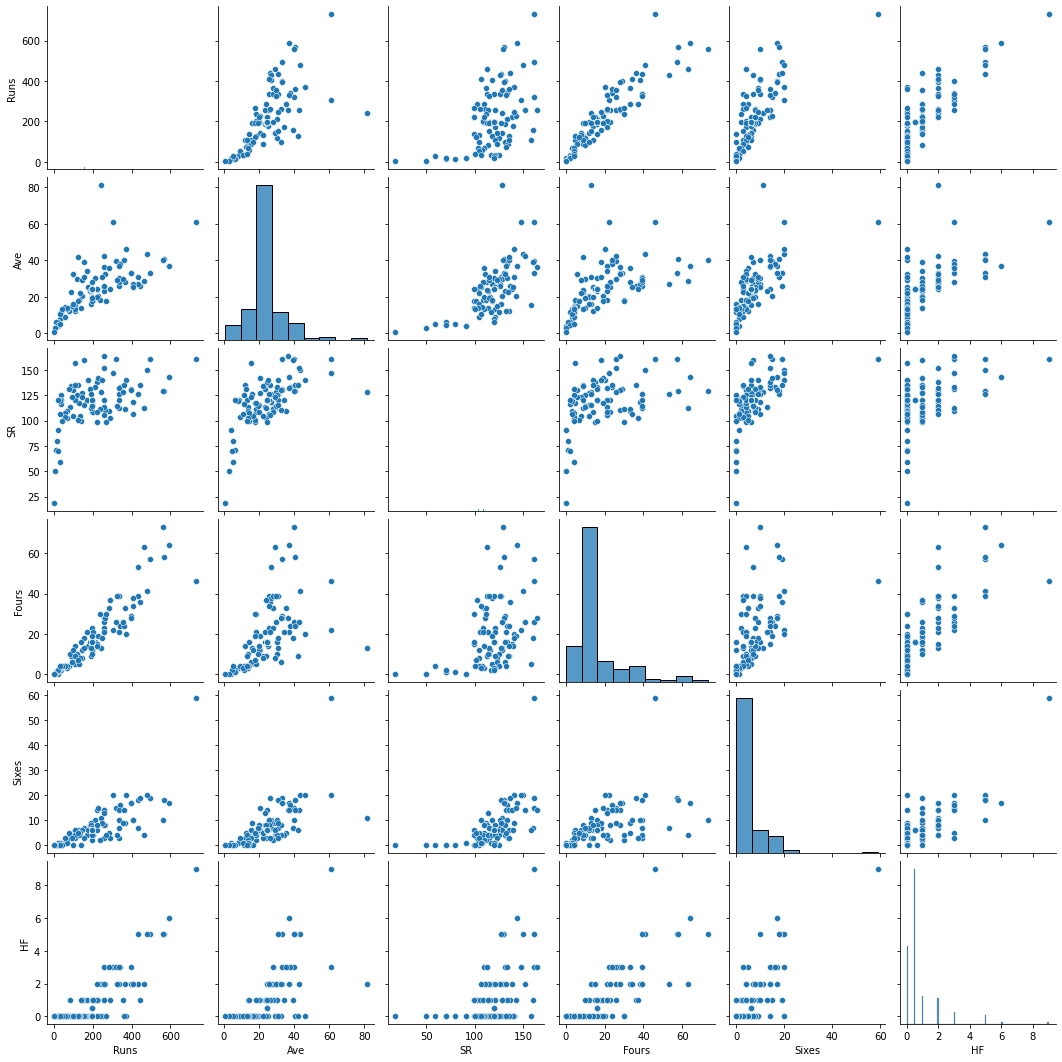

In [9]:
import seaborn as sns
sns.pairplot(data2)

In [10]:
data.corr()

,Runs,Ave,SR,Fours,Sixes,HF
Runs,1.000000,0.692984,0.493489,0.918809,0.769778,0.835148
Ave,0.692984,1.000000,0.623606,0.546211,0.682414,0.620754
SR,0.493489,0.623606,1.000000,0.384810,0.583943,0.427584
Fours,0.918809,0.546211,0.384810,1.000000,0.522574,0.783689
Sixes,0.769778,0.682414,0.583943,0.522574,1.000000,0.767696
HF,0.835148,0.620754,0.427584,0.783689,0.767696,1.000000


In [11]:
data.describe()

,Runs,Ave,SR,Fours,Sixes,HF
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,219.933333,24.729889,119.164111,19.788889,7.577778,1.188889
std,156.253669,13.619215,23.656547,16.399845,8.001373,1.688656
min,2.000000,0.500000,18.180000,0.000000,0.000000,0.000000
25%,98.000000,14.665000,108.745000,6.250000,3.000000,0.000000
50%,196.500000,24.440000,120.135000,16.000000,6.000000,0.500000
75%,330.750000,32.195000,131.997500,28.000000,10.000000,2.000000
max,733.000000,81.330000,164.100000,73.000000,59.000000,9.000000


In [12]:
data2.describe()

,Runs,Ave,SR,Fours,Sixes,HF
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,208.216667,24.584944,119.649556,17.894444,6.788889,0.844444
std,110.803668,9.604401,16.688015,11.719009,5.697190,1.239806
min,2.000000,0.500000,18.180000,0.000000,0.000000,0.000000
25%,196.375000,24.440000,120.101250,16.000000,6.000000,0.375000
50%,196.500000,24.440000,120.135000,16.000000,6.000000,0.500000
75%,196.625000,24.440000,120.168750,16.000000,6.000000,0.625000
max,733.000000,81.330000,164.100000,73.000000,59.000000,9.000000


In [13]:
from scipy.stats import zscore
XScaled=data2.apply(zscore)
XScaled.head()

,Runs,Ave,SR,Fours,Sixes,HF
0,-0.106038,-0.015134,0.029171,-0.162107,-0.138856,-0.278596
1,4.749366,3.810426,2.469141,2.404978,9.189925,6.596437
2,-0.106038,-0.015134,0.029171,-0.162107,-0.138856,-0.278596
3,3.455195,1.282675,1.436187,3.945228,1.797306,4.169955
4,-0.106038,-0.015134,0.029171,-0.162107,-0.138856,-0.278596


In [14]:
import numpy as np
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[1.00558659 0.69446145 0.49012736 0.92386612 0.77706353 0.83172315]
 [0.69446145 1.00558659 0.62630717 0.54440274 0.68161418 0.60367865]
 [0.49012736 0.62630717 1.00558659 0.37692426 0.57719595 0.40460102]
 [0.92386612 0.54440274 0.37692426 1.00558659 0.53615438 0.79226977]
 [0.77706353 0.68161418 0.57719595 0.53615438 1.00558659 0.77313947]
 [0.83172315 0.60367865 0.40460102 0.79226977 0.77313947 1.00558659]]


In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(XScaled)

PCA(n_components=6)

In [16]:
print(pca.explained_variance_)

[4.25646606 0.85131128 0.41308744 0.33003617 0.16536883 0.01724977]


In [17]:
print(pca.components_)

[[ 0.45967262  0.39643321  0.32115287  0.40842194  0.41977518  0.43056119]
 [ 0.24962859 -0.34615199 -0.70711783  0.45359761 -0.15250989  0.29805818]
 [-0.13612349 -0.01197597 -0.40246868 -0.5223749   0.68061493  0.28850255]
 [ 0.00925081  0.83799182 -0.46494371 -0.04573636 -0.21746296 -0.17924711]
 [ 0.47386221 -0.12891173 -0.12541492  0.07889914  0.40069532 -0.75916115]
 [-0.69514464  0.06346303 -0.05442997  0.58842867  0.359786   -0.18463338]]


In [18]:
print(pca.explained_variance_ratio_)

[0.70546984 0.14109696 0.06846542 0.05470044 0.02740835 0.00285899]


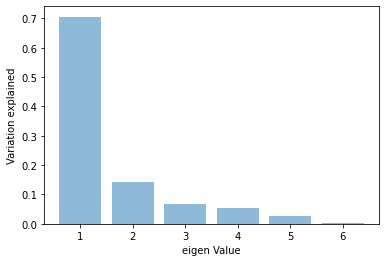

In [19]:
import matplotlib.pyplot as plt
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

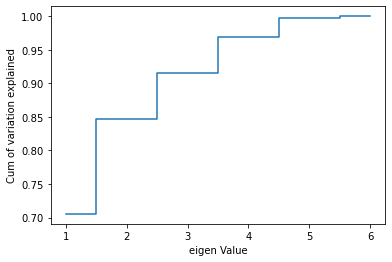

In [20]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

We can use 4 pca components for optimal results

In [21]:
pca3 = PCA(n_components=4)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 0.45967262  0.39643321  0.32115287  0.40842194  0.41977518  0.43056119]
 [ 0.24962859 -0.34615199 -0.70711783  0.45359761 -0.15250989  0.29805818]
 [-0.13612349 -0.01197597 -0.40246868 -0.5223749   0.68061493  0.28850255]
 [ 0.00925081  0.83799182 -0.46494371 -0.04573636 -0.21746296 -0.17924711]]
[0.70546984 0.14109696 0.06846542 0.05470044]


In [22]:
Xpca3

array([[-2.89822702e-01, -1.77250609e-01, -8.73275678e-02,
         6.03223720e-02],
       [ 1.21668222e+01, -2.23922737e-01,  5.21570320e+00,
        -1.20182606e+00],
       [-2.89822702e-01, -1.77250609e-01, -8.73275678e-02,
         6.03223720e-02],
       [ 6.71919195e+00,  2.16128977e+00, -6.98287078e-01,
        -8.79651959e-01],
       [-2.89822702e-01, -1.77250609e-01, -8.73275678e-02,
         6.03223720e-02],
       [ 6.05987413e+00,  7.68830701e-01, -6.84852799e-01,
        -1.62434128e+00],
       [-2.89822702e-01, -1.77250609e-01, -8.73275678e-02,
         6.03223720e-02],
       [ 5.72139435e+00,  1.94653584e-01,  4.35997712e-01,
        -3.56459122e-01],
       [-2.89822702e-01, -1.77250609e-01, -8.73275678e-02,
         6.03223720e-02],
       [ 6.03480438e+00,  2.06911171e+00, -1.85352919e-01,
        -3.19071022e-02],
       [-2.89822702e-01, -1.77250609e-01, -8.73275678e-02,
         6.03223720e-02],
       [ 5.89860332e+00,  2.88077072e+00, -1.79556977e+00,
      

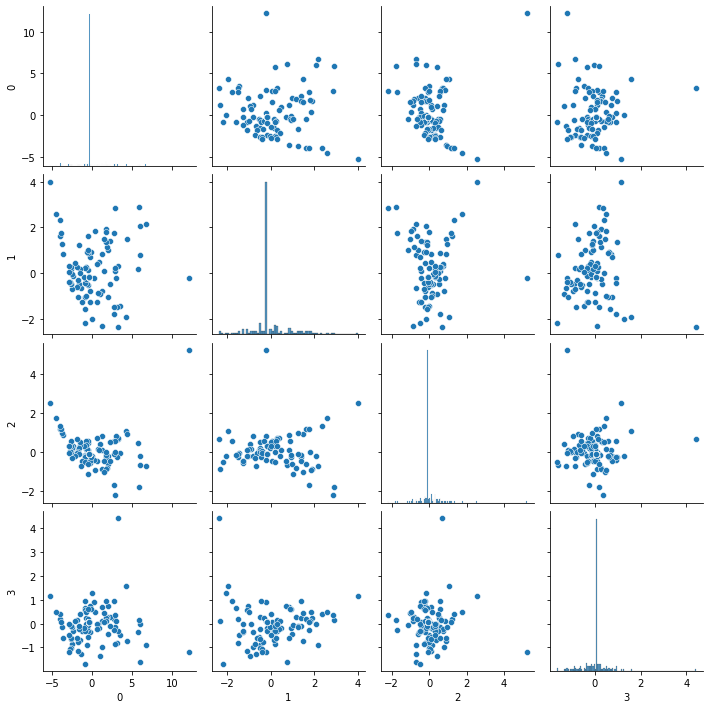

In [23]:
sns.pairplot(pd.DataFrame(Xpca3))

In [24]:
data3=pd.DataFrame(Xpca3)

Used for Calculating points for each feature
Points= (No of Players –  Rank according to that particular feature)/ No of players

In [25]:
rank2=data3.rank(axis=0, method='first', ascending=False, pct=False)

In [26]:
rank2

,0,1,2,3
0,46.0,53.0,53.0,39.0
1,1.0,143.0,1.0,175.0
2,47.0,54.0,54.0,40.0
3,2.0,6.0,170.0,169.0
4,48.0,55.0,55.0,41.0
...,...,...,...,...
175,178.0,5.0,4.0,21.0
176,134.0,141.0,141.0,127.0
177,179.0,4.0,3.0,17.0
178,135.0,142.0,142.0,128.0


In [27]:
rank2['points_0']=(180-rank2[0])/180

In [28]:
rank2['points_1']=(180-rank2[1])/180

In [29]:
rank2['points_2']=(180-rank2[2])/180

In [30]:
rank2['points_3']=(180-rank2[3])/180

In [31]:
rank2['points_sum']=0
for i in rank2.columns[4:8]:
    rank2['points_sum']=rank2[i]+rank2['points_sum']
rank2['points_sum']

0      2.938889
1      2.222222
2      2.916667
3      2.072222
4      2.894444
         ...   
175    2.844444
176    0.983333
177    2.872222
178    0.961111
179    2.961111
Name: points_sum, Length: 180, dtype: float64

In [32]:
rank2['final_rank']=rank2.points_sum.rank(axis=0, method='first', ascending=False, pct=False)

In [33]:
rank2['final_rank'].value_counts()

3.0      1
70.0     1
68.0     1
1.0      1
67.0     1
        ..
125.0    1
76.0     1
124.0    1
140.0    1
4.0      1
Name: final_rank, Length: 180, dtype: int64

In [34]:
rank2.head(20)

,0,1,2,3,points_0,points_1,points_2,points_3,points_sum,final_rank
0,46.0,53.0,53.0,39.0,0.744444,0.705556,0.705556,0.783333,2.938889,4.0
1,1.0,143.0,1.0,175.0,0.994444,0.205556,0.994444,0.027778,2.222222,69.0
2,47.0,54.0,54.0,40.0,0.738889,0.700000,0.700000,0.777778,2.916667,7.0
3,2.0,6.0,170.0,169.0,0.988889,0.966667,0.055556,0.061111,2.072222,81.0
4,48.0,55.0,55.0,41.0,0.733333,0.694444,0.694444,0.772222,2.894444,9.0
5,3.0,30.0,169.0,179.0,0.983333,0.833333,0.061111,0.005556,1.883333,104.0
6,49.0,56.0,56.0,42.0,0.727778,0.688889,0.688889,0.766667,2.872222,11.0
7,6.0,43.0,25.0,154.0,0.966667,0.761111,0.861111,0.144444,2.733333,30.0
8,50.0,57.0,57.0,43.0,0.722222,0.683333,0.683333,0.761111,2.850000,16.0
9,4.0,7.0,147.0,133.0,0.977778,0.961111,0.183333,0.261111,2.383333,60.0
